# ***Part A*** 

II. A store is interested in determining the associations between items purchased from its Departments. The store chose to conduct a market basket analysis of specific items purchased to analyze customer’s buying behavior. You are hereby provided with a file ‘transactions.csv’ containing information for transactions made over the past 3 months.
  - a) Generate a plot of the top 10 transactions
  - b) Generate association rules using minimum support of 0.002, minimum confidence of 0.20, and maximum length of 3. Display the rules, sorted by descending lift value.

  - c) Select the rule from QII-b with the greatest lift. Compare this rule with the highest lift rule for maximum length of 2.
    - i) Which rule has the better lift?
    - ii) Which rule has the greater support?
    - iii) If you were a marketing manager, and could fund only one of these rules, which would it be, and why?

In [2]:
# load the grocery data into a sparse matrix
install.packages("arules")
install.packages("arulesViz")
library(arules)
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘coda’, ‘foreach’, ‘zoo’, ‘statnet.common’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘ggrepel’, ‘network’, ‘sna’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggnetwork’, ‘DT’, ‘plotly’, ‘visNetwork’


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [3]:
load_google_drive_data <- function(google_file_url){
    g_link = google_file_url 
    file_id = substr(g_link, regexpr("/d/", g_link) + 3 ,  regexpr("/view", g_link) -1 )
    url =  paste("https://drive.google.com/uc?export=download&id=", file_id, sep="")
    download.file(url, "file.csv")
    df <- read.csv("file.csv" , stringsAsFactors = TRUE)
    
    return(df)
}

In [4]:
transaction_data <- load_google_drive_data("https://drive.google.com/file/d/1KvbTInxZr5hs7oawB9cONGpora8hRezo/view?usp=sharing" )


In [5]:
trans <- read.transactions("/content/file.csv",  format = "basket", 
                 header = FALSE, sep = ",", 
                  cols = NULL, rm.duplicates = FALSE, 
                  quote = "\"'", skip = 0, 
                  encoding = "unknown") 

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [6]:
summary(trans)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [7]:
inspect(trans[1:5])

    items               
[1] {almonds,           
     antioxydant juice, 
     avocado,           
     cottage cheese,    
     energy drink,      
     frozen smoothie,   
     green grapes,      
     green tea,         
     honey,             
     low fat yogurt,    
     mineral water,     
     olive oil,         
     salad,             
     salmon,            
     shrimp,            
     spinach,           
     tomato juice,      
     vegetables mix,    
     whole weat flour,  
     yams}              
[2] {burgers,           
     eggs,              
     meatballs}         
[3] {chutney}           
[4] {avocado,           
     turkey}            
[5] {energy bar,        
     green tea,         
     milk,              
     mineral water,     
     whole wheat rice}  


## **a) Generate a plot of the top 10 transactions**

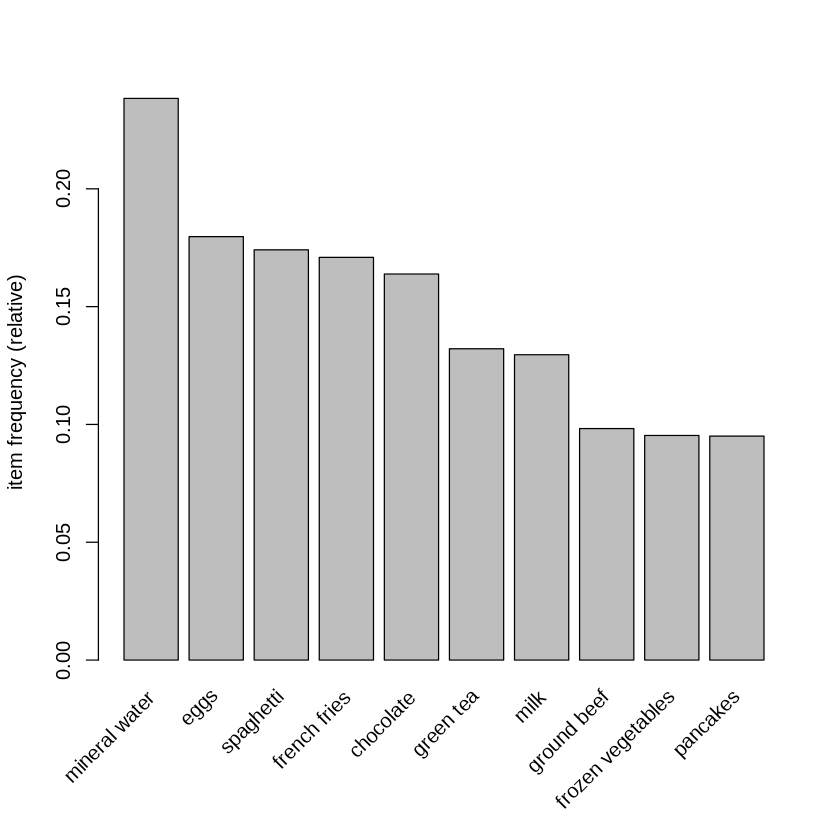

In [8]:
itemFrequencyPlot(trans, topN = 10)

### **b) Generate association rules using minimum support of 0.002, minimum confidence of 0.20, and maximum length of 3. Display the rules, sorted by descending lift value.**

In [9]:
trans_assoc <- apriori(trans, parameter = list(support = 0.002, confidence =0.20, maxlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(trans, parameter = list(support = 0.002, confidence = 0.2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.01s].
writing ... [2023 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [10]:
# sorting trans rules by lift to determine actionable rules
print(trans_assoc)
inspect(sort(trans_assoc, by = "lift"  , decreasing = TRUE)[1:5])



set of 2023 rules 
    lhs                                   rhs                    support    
[1] {escalope, mushroom cream sauce}   => {pasta}                0.002532996
[2] {escalope, pasta}                  => {mushroom cream sauce} 0.002532996
[3] {mushroom cream sauce, pasta}      => {escalope}             0.002532996
[4] {parmesan cheese, tomatoes}        => {frozen vegetables}    0.002133049
[5] {mineral water, whole wheat pasta} => {olive oil}            0.003866151
    confidence coverage    lift      count
[1] 0.4418605  0.005732569 28.088096 19   
[2] 0.4318182  0.005865885 22.650826 19   
[3] 0.9500000  0.002666311 11.976387 19   
[4] 0.6666667  0.003199573  6.993939 16   
[5] 0.4027778  0.009598720  6.115863 29   


## c) Select the rule from QII-b with the greatest lift. Compare this rule with the highest lift rule for maximum length of 2.
  - i) Which rule has the better lift?
  - ii) Which rule has the greater support?
  - iii) If you were a marketing manager, and could fund only one of these rules, which would it be, and why? 

In [11]:
trans_assoc <- apriori(trans, parameter = list(support =
                                                      0.002, confidence =0.20, maxlen = 2))



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2

Warning message in apriori(trans, parameter = list(support = 0.002, confidence = 0.2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.00s].
writing ... [358 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [12]:
# sorting trans rules by lift to determine actionable rules
inspect(sort(trans_assoc, by = "lift"  , decreasing = TRUE)[1:5])

    lhs                    rhs         support     confidence coverage  
[1] {fromage blanc}     => {honey}     0.003332889 0.2450980  0.01359819
[2] {light cream}       => {chicken}   0.004532729 0.2905983  0.01559792
[3] {pasta}             => {escalope}  0.005865885 0.3728814  0.01573124
[4] {pasta}             => {shrimp}    0.005065991 0.3220339  0.01573124
[5] {whole wheat pasta} => {olive oil} 0.007998933 0.2714932  0.02946274
    lift     count
[1] 5.164271 25   
[2] 4.843951 34   
[3] 4.700812 44   
[4] 4.506672 38   
[5] 4.122410 60   


### **for maximum lenght of 3  we get rule**
 - **{escalope,mushroom cream sauce}   -->  {pasta}** 
   -  with support = 0.002532996, lift = 28.088096 , confidence = 0.4418605

### **for maximum lenght of 2  we get rule** 
 - **{fromage blanc}     => {honey}** 
     - with support =  0.003332889  , lift = 5.164271 , confidence = 0.2450980

 - **The Rule That has the better lift is     {escalope,mushroom cream sauce} -->  {pasta}      with  28.088**

 - **The Rule That has the greatest support  is     {fromage blanc} -->   {honey} with     0.0033**

### iii) If you were a marketing manager, and could fund only one of these rules, which would it be, and why? 

**as I Found that the difference in support between two rules is small  while there is a big difference between lift of two rules which indicate that the relationship between  escalope ,mushroom cream sauce and pasta is very interesting and if escalope and mushroom cream sauce are bought then pasta is likely to be bought as well with high confidence**

# **Part B: Course Recommender System using Collaborative Filtering**

### **3 - Use R to compute the cosine similarity between users.**


In [13]:
#take a look at the movie names that correspond to these number
install.packages("dplyr")
library(dplyr)
install.packages("recommenderlab", dependencies=TRUE)
library(recommenderlab)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘float’, ‘RcppProgress’, ‘gplots’, ‘proxy’, ‘irlba’, ‘recosystem’, ‘ROCR’


Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loading required package: registry

Registered S3 methods overwritten by 'registry':
  method              

In [15]:
studentid <- c('LN','MH','JH','EN','DU','FL','GL', 'AH' ,'SA','RW','BA','MG','AF','KG','DS')
SQL <- c(4,3,2,4,4 ,NA,NA,NA,NA,NA,NA,NA,NA,NA,4)
Spatial <- c(NA ,4,2 ,NA ,4,4,4,3,NA,NA,NA,NA,NA,NA,NA)
PA1 <- c(NA,NA,NA,NA,NA,NA,NA,NA, 4,2,4,4,4,3,NA)
DM_IN_R <- c(NA,NA,NA ,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2)
PYTHON <- c(3,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA)
FORCAST <- c(2 ,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,4,NA,NA,NA)
R_PROG <- c(4 ,NA,NA ,4 ,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,4)
HADOOP <- c(NA,NA,NA,NA,NA,NA,NA,NA,NA,4, NA,NA ,NA,NA,NA)
REGRESSION <- c(2 ,NA,NA,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA ,NA)
STAT_COURSE <- data.frame(studentid,SQL,Spatial,
                          PA1,DM_IN_R,PYTHON,FORCAST,
                          R_PROG,HADOOP,REGRESSION)
STAT_COURSE[is.na(STAT_COURSE)] <- 0
# first remember the names
n <- STAT_COURSE$studentid

# transpose all but the first column (name)
Courses <- as.data.frame(t(STAT_COURSE[,-1]))
colnames(Courses) <- n
Courses

,LN,MH,JH,EN,DU,FL,GL,AH,SA,RW,BA,MG,AF,KG,DS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SQL,4,3,2,4,4,0,0,0,0,0,0,0,0,0,4
Spatial,0,4,2,0,4,4,4,3,0,0,0,0,0,0,0
PA1,0,0,0,0,0,0,0,0,4,2,4,4,4,3,0
DM_IN_R,0,0,0,4,0,0,0,0,0,0,0,0,0,0,2
PYTHON,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0
FORCAST,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0
R_PROG,4,0,0,4,0,0,0,0,0,0,0,0,0,0,4
HADOOP,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
REGRESSION,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0


In [16]:

Courses_mat = as.matrix(Courses) # Check the column types
Courses_mat


,LN,MH,JH,EN,DU,FL,GL,AH,SA,RW,BA,MG,AF,KG,DS
SQL,4,3,2,4,4,0,0,0,0,0,0,0,0,0,4
Spatial,0,4,2,0,4,4,4,3,0,0,0,0,0,0,0
PA1,0,0,0,0,0,0,0,0,4,2,4,4,4,3,0
DM_IN_R,0,0,0,4,0,0,0,0,0,0,0,0,0,0,2
PYTHON,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0
FORCAST,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0
R_PROG,4,0,0,4,0,0,0,0,0,0,0,0,0,0,4
HADOOP,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
REGRESSION,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0


In [17]:
install.packages('lsa')
library(lsa)
Cos = cosine(Courses_mat)
Cos

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Loading required package: SnowballC



,LN,MH,JH,EN,DU,FL,GL,AH,SA,RW,BA,MG,AF,KG,DS
LN,1.0000000,0.5354529,0.4040610,0.7190319,0.4040610,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.2020305,0.0000000,0.0000000,0.7619048
MH,0.5354529,1.0000000,0.7730207,0.2482286,0.7730207,0.6246950,0.6246950,0.6246950,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.3123475
JH,0.4040610,0.7730207,1.0000000,0.3746343,1.0000000,0.7071068,0.7071068,0.7071068,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4714045
EN,0.7190319,0.2482286,0.3746343,1.0000000,0.3746343,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8830216
DU,0.4040610,0.7730207,1.0000000,0.3746343,1.0000000,0.7071068,0.7071068,0.7071068,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4714045
FL,0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
GL,0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
AH,0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
SA,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4472136,1.0000000,0.7071068,1.0000000,1.0000000,0.0000000
RW,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4472136,1.0000000,0.4472136,0.3162278,0.4472136,0.4472136,0.0000000


## **4) Based on the cosine similarities of the nearest students to E.N., which course should be recommended to E.N.?**

In [18]:
# similarity between EN and all students
R = as.data.frame(Cos)
sim = t(subset(R, select = 'EN'))
sim

,LN,MH,JH,EN,DU,FL,GL,AH,SA,RW,BA,MG,AF,KG,DS
EN,0.7190319,0.2482286,0.3746343,1,0.3746343,0,0,0,0,0,0,0,0,0,0.8830216


based on cosine similarity(choose high values) we will choose the recommended course which EN doesn't take it yet 

In [19]:
# first the cosine sim between EN and DS is the largest one 
EN_DS = t(subset(Courses ,select = c('EN','DS')))
EN_DS

,SQL,Spatial,PA1,DM_IN_R,PYTHON,FORCAST,R_PROG,HADOOP,REGRESSION
EN,4,0,0,4,0,0,4,0,3
DS,4,0,0,2,0,0,4,0,0


####    therefor there is no courses that DS take while EN didn't so there is no recommendation from DS Courses

In [20]:
# first the cosine sim between EN and LN is the  second largest one 
EN_LN = t(subset(Courses ,select = c('EN','LN')))
EN_LN

,SQL,Spatial,PA1,DM_IN_R,PYTHON,FORCAST,R_PROG,HADOOP,REGRESSION
EN,4,0,0,4,0,0,4,0,3
LN,4,0,0,0,3,2,4,0,2


here there are two courses that LN had token while the EN didn't 
  - Python with rating 3
  - Regression with rating 2 

so the recommender system will return **Python Course** as a single Course recommended


## **5) Apply item-based collaborative filtering to this dataset (using R) and based on the results recommend a course to E.N.**

In [22]:
ratings_id <-data.frame(studentid,SQL,Spatial,
                          PA1,DM_IN_R,PYTHON,FORCAST,
                          R_PROG,HADOOP,REGRESSION)
ratings_id

studentid,SQL,Spatial,PA1,DM_IN_R,PYTHON,FORCAST,R_PROG,HADOOP,REGRESSION
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LN,4,NA,NA,NA,3,2,4,NA,2
MH,3,4,NA,NA,4,NA,NA,NA,NA
JH,2,2,NA,NA,NA,NA,NA,NA,NA
EN,4,NA,NA,4,NA,NA,4,NA,3
DU,4,4,NA,NA,NA,NA,NA,NA,NA
FL,NA,4,NA,NA,NA,NA,NA,NA,NA
GL,NA,4,NA,NA,NA,NA,NA,NA,NA
AH,NA,3,NA,NA,NA,NA,NA,NA,NA
SA,NA,NA,4,NA,NA,NA,NA,NA,NA


In [23]:
ratings<-  as.matrix(ratings_id[,-1])
ratings

SQL,Spatial,PA1,DM_IN_R,PYTHON,FORCAST,R_PROG,HADOOP,REGRESSION
4,NA,NA,NA,3,2,4,NA,2
3,4,NA,NA,4,NA,NA,NA,NA
2,2,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,4,NA,NA,4,NA,3
4,4,NA,NA,NA,NA,NA,NA,NA
NA,4,NA,NA,NA,NA,NA,NA,NA
NA,4,NA,NA,NA,NA,NA,NA,NA
NA,3,NA,NA,NA,NA,NA,NA,NA
NA,NA,4,NA,NA,NA,NA,NA,NA
NA,NA,2,NA,NA,NA,NA,4,NA


In [24]:
#Convert ratings matrix to real rating matrx which makes it dense
ratingmat = as(ratings, "realRatingMatrix")
ratingmat

15 x 9 rating matrix of class ‘realRatingMatrix’ with 30 ratings.

In [ ]:
#Create Recommender Model. The parameters are UBCF and Cosine similarity
#We take 10 nearest neighbours
rec_mod = Recommender(ratingmat, method = "IBCF", param=list(method="Cosine",nn=9))
rec_mod 

In [26]:
#Obtain top 1 recommendations for 1st user entry in dataset
Top_3_pred = predict(rec_mod, ratingmat[4], n=3)
#Convert the recommendations to a list
Top_3_List = as(Top_3_pred, "list")
Top_3_List[[1]]

[1] "FORCAST" "Spatial" "PYTHON"

In [27]:
#Obtain top 1 recommendations for 1st user entry in dataset
Top_1_pred = predict(rec_mod, ratingmat[4], n=1)
#Convert the recommendations to a list
Top_1_List = as(Top_1_pred, "list")
Top_1_List[[1]]

[1] "FORCAST"